In [39]:
import yt
print(yt.__version__) # 3.6.0 or higher
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment
from scipy.interpolate import interp2d

3.6.0


## Plot a single image

In [26]:
datfile = '~/uni/astro/archive/output2_A800/turbulence_0050.dat'
ds = yt.load(datfile)
ad = ds.all_data()
print(ds.field_list)

yt : [INFO     ] 2020-12-03 14:28:32,427 Parameters: current_time              = 37.5
yt : [INFO     ] 2020-12-03 14:28:32,428 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-03 14:28:32,428 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-03 14:28:32,429 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-03 14:28:32,430 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-03 14:28:32,821 e not found and no parfile passed, can not set thermal_pressure.


[('amrvac', 'curlV'), ('amrvac', 'm1'), ('amrvac', 'm2'), ('amrvac', 'rho')]


yt : [INFO     ] 2020-12-03 14:32:03,189 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-12-03 14:32:03,189 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-12-03 14:32:03,190 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-12-03 14:32:03,191 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-12-03 14:32:03,191 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_axes_unit_names', '_background_color', '_callbacks', '_cbar_minorticks', '_colorbar_label', '_colorbar_valid', '_colormaps', '_current_field', '_data_valid', '_equivalencies', '_field_transform', '_font_color', '_font_properties', '_frb', '_frb_generator', '_get_axes_labels', '_get_axes_unit_labels', '_initialize_dataset', '_minorticks', '_periodic', '_plot_type', '_plot_valid', '_projection', '_recreate_frb', '_repr_html_', '_right_handed', '_set_font_properties', '_set_window', '_setup_origin', '_setup_plots', '_splat_color', '_switch_ds', '_transform', '_xlabel', '_ylabel', 'annotate_arrow', 'annotate_cell_edges', '


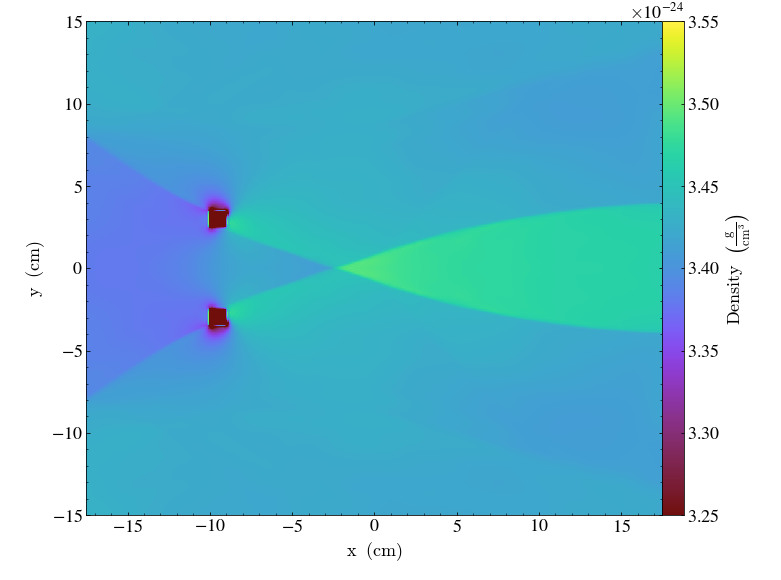

In [31]:
dat = 'density'

p = yt.plot_2d(ds, dat)
p.set_log(dat, False)
p.set_zlim(dat, 3.25e-24, 3.55e-24)
print(dir(p))
p.show()

## Plot the average velocity

### Axis 0

yt : [INFO     ] 2020-12-04 15:04:36,390 Parameters: current_time              = 22.5
yt : [INFO     ] 2020-12-04 15:04:36,392 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-04 15:04:36,396 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 15:04:36,401 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 15:04:36,404 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-04 15:04:37,159 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-04 15:04:38,953 Parameters: current_time              = 23.25
yt : [INFO     ] 2020-12-04 15:04:38,954 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-04 15:04:38,955 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 15:04:38,956 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 15:04:38,960 Parameters: cosmological_simulati

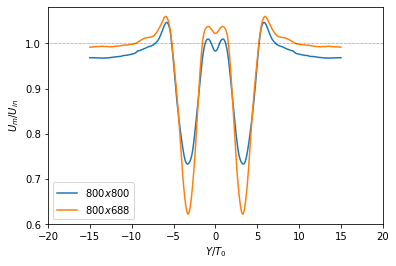

In [38]:

data = 'm1'
U_in = 5
total = {}

names = ['A800','Q']



for name in names:
    BEGIN = 30
    NUM = 35

    ts = yt.load(f"./output3_{name}/*.dat")
    total[name] = None
    for ds in ts[BEGIN:BEGIN+NUM]:
        all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)

        profile = np.squeeze(all_data_level_0[data])[-10,:]
        if total[name] is None:
            total[name] = profile
        else:
            total[name] += profile

    total[name] /= len(ts[BEGIN:BEGIN+NUM]) * U_in
    x = np.linspace(-15, 15, total[name].size)
    plt.plot(x,total[name])


plt.legend(names) # ["$800x800$", "$800x688$"]) 
plt.plot([-20, 20], [1, 1], linestyle=':', color="black", linewidth=0.5)
plt.xlim([-20, 20])
#plt.ylim([0.7, 1.2])   # dimensions used in paper
plt.xlabel('$Y/T_0$')
plt.ylabel('$U_m/U_{in}$')

plt.savefig('./figure2_dom.png', dpi=150, format="png")
plt.show()


In [ ]:
plt.show()

### Axis 1

yt : [INFO     ] 2020-12-03 13:37:36,466 Parameters: current_time              = 22.5
yt : [INFO     ] 2020-12-03 13:37:36,466 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-03 13:37:36,467 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-03 13:37:36,467 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-03 13:37:36,468 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-03 13:37:36,794 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-03 13:37:37,459 Parameters: current_time              = 23.25
yt : [INFO     ] 2020-12-03 13:37:37,459 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-03 13:37:37,460 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-03 13:37:37,460 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-03 13:37:37,461 Parameters: cosmological_simulati

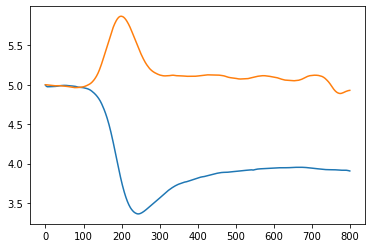

In [3]:
data = 'm1'

total = {}
for name in ('A800', 'norho'):
    BEGIN = 30
    NUM = 35

    ts = yt.load(f"~/uni/astro/archive/output2_{name}/*.dat")
    total[name] = None
    for ds in ts[BEGIN:BEGIN+NUM]:
        all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)

        squeezed = np.squeeze(all_data_level_0[data])
        profile = squeezed[:,squeezed.shape[1]//2]
        if total[name] is None:
            total[name] = profile
        else:
            total[name] += profile

    total[name] /= len(ts[BEGIN:BEGIN+NUM])
    plt.plot(total[name])

plt.show()


## Plot slices along the various axes

average along y axis:
[5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         

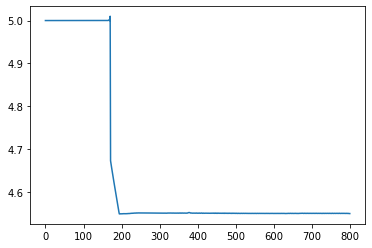

---
skewness along y axis:
[ 1.89175293e-45 -1.07899982e-45 -4.55422001e-47 -3.85006753e-45
  7.63532501e-45 -2.91645243e-45  8.37275832e-46  6.25679764e-45
  7.70889318e-45  6.57559304e-45  1.05482742e-44  2.72797779e-44
  1.63461466e-44  3.89490908e-44  2.18655109e-44 -7.58627956e-45
  6.45473105e-45 -1.52373692e-44  3.77755034e-44  1.03641786e-43
  7.74497661e-44  9.93047673e-44  1.06638813e-44  3.56753073e-44
  1.65528381e-45  3.35085495e-44  1.62571641e-43  2.14799787e-43
  1.27427076e-43 -4.38361192e-44  1.30220915e-43  9.68717628e-44
  1.49541317e-43  9.97321633e-44  1.10891754e-43  1.69560617e-43
  9.78316523e-44  1.83526308e-43  3.29704509e-43  4.07558900e-43
  2.91951777e-43  2.95980510e-43  2.96134653e-43  2.07357140e-43
  1.10022949e-43  2.04869835e-43  3.10774719e-43  3.52037703e-43
  3.57495761e-43  2.25446152e-43  2.86190689e-43  4.49678429e-43
  5.60559673e-43  4.20925536e-43  4.14067932e-43  3.68462673e-43
  2.17409705e-43  3.80671486e-43  5.09433299e-43  3.69809671e-4

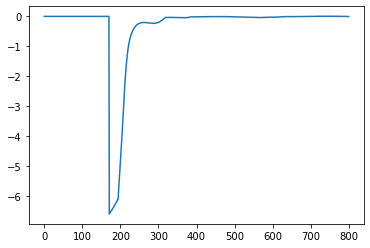

---



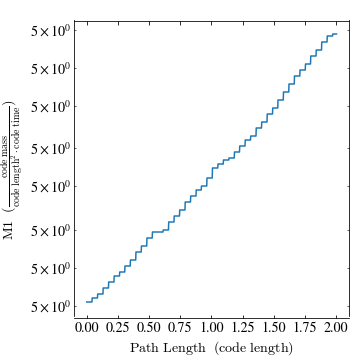

In [10]:
all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0],dims=ds.domain_dimensions)

print('average along y axis:')

print(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.plot(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.show()
print('---')


print('skewness along y axis:')
print(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.plot(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.show()
print('---')


p = yt.LinePlot(ds, ['m1'], (0, 0.5, 0), (2, 0.5, 0), 1000)
p.show()

In [18]:
p = yt.SlicePlot(ds, 'y', 'm1')
p.show()

yt : [INFO     ] 2020-11-29 15:14:41,513 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-29 15:14:41,514 ylim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 15:14:41,515 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-29 15:14:41,517 ylim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 15:14:41,519 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800


KeyboardInterrupt: 

yt : [INFO     ] 2020-11-29 14:58:53,477 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:58:53,478 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:58:53,479 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:58:53,479 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:58:53,481 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800
yt : [WARNING  ] 2020-11-29 14:58:54,282 Plot image for field ('amrvac', 'm1') has both positive and negative values. Min = -0.915418, Max = 5.154242.
yt : [WARNING  ] 2020-11-29 14:58:54,283 Switching to symlog colorbar scaling unless linear scaling is specified later
C:\Users\semvi\anaconda3\lib\site-packages\yt\visualization\base_plot_types.py:220: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(



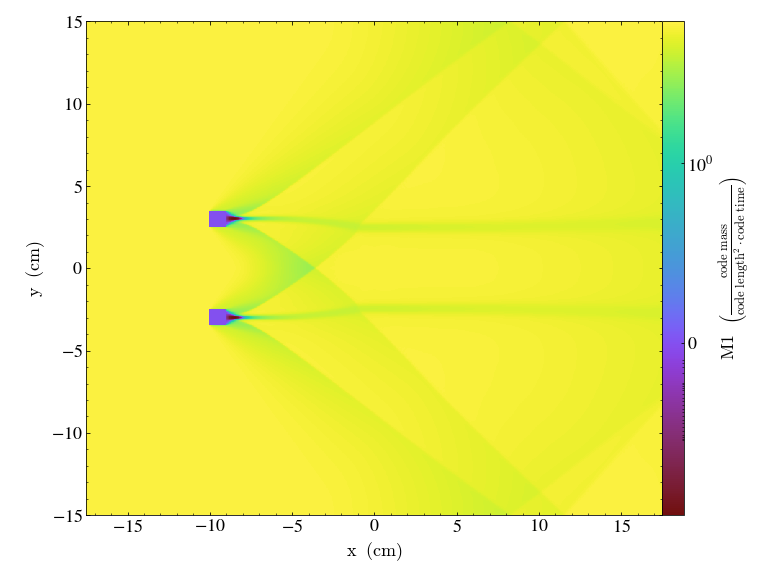

In [13]:
p = yt.SlicePlot(ds, 'z', 'm1')
p.show()

## Energy spectrum of Y at X = 26

TODO
* also use m2?
* average/filter data
* plot dashed lines

In [2]:
ts = yt.load("output/*.dat")
data = 'm1'
U_in = 5
dt = 0.75
X, X_max = 26, 35
X_index = int( 800 * X / X_max)

r = range(400)
d = []
for I in r:
    ds = ts[I]
    sl = np.average(np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)[data])[X_index,400:401],axis=0)
    d.append(sl)

fourier = np.fft.fft(d)
for i in range(len(fourier)): fourier[i] *= i
e = np.square(np.absolute(fourier))
f = np.linspace(0.2, e.size/U_in, e.size) # scale x-axis values
plt.loglog(f[1:f.size//2],e[1:f.size//2])
plt.loglog([i / 100 for i in range(100,1100)], [(i/100) ** (-5/3) for i in range(100,1100)])
plt.ylim(1e-8, 1e8)
plt.show()


yt : [INFO     ] 2020-12-02 10:13:49,971 Parameters: current_time              = 63.63999622371359
yt : [INFO     ] 2020-12-02 10:13:49,972 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:13:49,972 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:13:49,973 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:13:49,973 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:13:50,345 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:13:51,166 Parameters: current_time              = 63.65
yt : [INFO     ] 2020-12-02 10:13:51,166 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:13:51,167 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:13:51,167 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:13:51,168 Parameters: cosmolog

IndexError: list index out of range

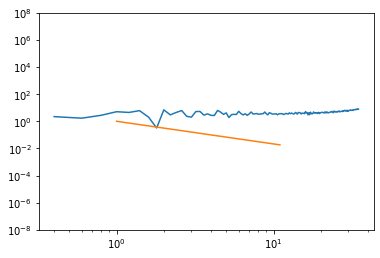

In [13]:
fourier = np.fft.fft(d)
for i in range(len(fourier)): fourier[i] *= i
e = np.square(np.absolute(fourier))
f = np.linspace(0.2, e.size/U_in, e.size) # scale x-axis values
plt.loglog(f[1:f.size//2],e[1:f.size//2])
plt.loglog([i / 100 for i in range(100,1100)], [(i/100) ** (-5/3) for i in range(100,1100)])
plt.ylim(1e-8, 1e8)
plt.show()

## Covergence test for grid sizes 50..800

This is the first version, which casts everything down to the smallest grid

In [66]:
ts = {}
# dims = np.array([200,400,800])
dims = np.array([50,100,200,400,800])
for dim in dims:
    ts[dim] = yt.load(f'./output3_A{dim if dim > 99 else f"0{dim}"}/*.dat')

start = 30     # first timeframe to check
step = 1      # step between timeframes
data = 'm1'
nb_time_checks = 40
err_approx = np.empty((nb_time_checks,dims.size-1))

# use domain dimensions of the smallest grid, to easily compare the grids
dom_dims = ts[dims[0]][0].domain_dimensions

for i in range(nb_time_checks):
    time = start+step*i
    
    # use grid with highest resolution as a reference
    ds = ts[dims[-1]][time]
    ref = np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=dom_dims)[data])
    ref_norm = np.linalg.norm(ref)
    x_ref = np.linspace(1,ds.domain_dimensions[0],ds.domain_dimensions[0])
    y_ref = np.linspace(1,ds.domain_dimensions[1],ds.domain_dimensions[1])
            
    # ugly fix
    f = interp2d(x_ref, y_ref, ref)
    ref = f(x_ref,y_ref)
    
    for j in range(dims.size-1):
        ds = ts[dims[j]][time]
        comp = np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)[data])
        Nx, Ny = ds.domain_dimensions[0], ds.domain_dimensions[1]
        x = np.linspace(1,Nx,Nx)
        y = np.linspace(1,Ny,Ny)
        
        # linear interpolation
        f = interp2d(x, y, comp)
        comp = f(x_ref/Nx,y_ref/Ny)
        
        err_approx[i,j] = np.linalg.norm(comp-ref) / ref_norm
        
print(err_approx)   

# plot average error over different times, in function of domain size
plt.loglog(dims[0:dims.size-1],np.average(err_approx,0))
plt.xticks(dims[0:dims.size-1], dims[0:dims.size-1])
plt.xlabel("Domain size")
plt.ylabel("Relative error to $(800x800)$ grid")

plt.savefig('./convergence.png', dpi=150, format="png")
plt.show()

yt : [INFO     ] 2020-12-04 17:24:46,455 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-12-04 17:24:46,456 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-04 17:24:46,459 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 17:24:46,461 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 17:24:46,461 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2020-12-04 17:24:46,475 Parameters: current_time              = 22.5
yt : [INFO     ] 2020-12-04 17:24:46,477 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-04 17:24:46,478 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 17:24:46,478 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 17:24:46,480 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-04 17:24:46,951 e not found and no parfile passed, can not set thermal_pre

KeyboardInterrupt: 

this one casts the 800 grid to the same grid as the smaller grids we're comparing

yt : [INFO     ] 2020-12-04 18:28:44,132 Parameters: current_time              = 22.5
yt : [INFO     ] 2020-12-04 18:28:44,133 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-04 18:28:44,134 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 18:28:44,134 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 18:28:44,135 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2020-12-04 18:28:44,166 Parameters: current_time              = 22.5
yt : [INFO     ] 2020-12-04 18:28:44,167 Parameters: domain_dimensions         = [50 50  1]
yt : [INFO     ] 2020-12-04 18:28:44,168 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 18:28:44,169 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 18:28:44,169 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-04 18:28:44,188 e not found and no parfile passed, can not set thermal_press

[[0.13731286 0.18758649 0.11750884 0.25704607]
 [0.14053602 0.18620128 0.11677619 0.25867086]
 [0.14089062 0.19163672 0.10440932 0.25864735]
 [0.18009881 0.22492911 0.12733337 0.28289997]
 [0.13777509 0.18553687 0.11933486 0.24836001]
 [0.14315226 0.19303093 0.10691927 0.27301757]
 [0.13777072 0.20086961 0.12713859 0.26184456]
 [0.13772541 0.19518282 0.11341357 0.2659687 ]
 [0.15214543 0.19202906 0.11537895 0.23770753]
 [0.1362639  0.18600599 0.12024702 0.2593893 ]
 [0.13871524 0.18962462 0.11295206 0.25294717]
 [0.1405922  0.18666546 0.11447669 0.23389395]
 [0.13818087 0.18654526 0.11913202 0.25700444]
 [0.13777226 0.18705715 0.10593012 0.24782379]
 [0.13766182 0.18840738 0.11635858 0.26595657]
 [0.13863032 0.18492389 0.10719063 0.24302669]
 [0.138036   0.18339981 0.1050945  0.23535398]
 [0.13878103 0.18905515 0.11438906 0.26701716]
 [0.13796319 0.18856698 0.09123711 0.23763005]
 [0.13745592 0.18068332 0.11265566 0.24189211]]


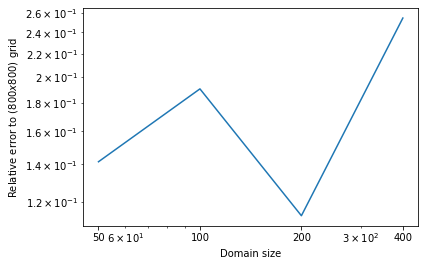

In [97]:
ts = {}
# dims = np.array([200,400,800])
dims = np.array([50,100,200,400,800])
for dim in dims:
    ts[dim] = yt.load(f'./output3_A{dim if dim > 99 else f"0{dim}"}/*.dat')

start = 30     # first timeframe to check
step = 1      # step between timeframes
data = 'm1'
nb_time_checks = 20
err_approx = np.empty((nb_time_checks,dims.size-1))

# use domain dimensions of the finest grid, to easily compare the grids
#dom_dims = ts[dims[-1]][0].domain_dimensions

for i in range(nb_time_checks):
    time = start+step*i
    
    # use grid with highest resolution as a reference
    ds_ref = ts[dims[-1]][time]
    
    for j in range(dims.size-1):
        ds = ts[dims[j]][time]
        comp_dims = ds.domain_dimensions
        comp = np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=comp_dims)[data]) # [comp_dims[0]//2:comp_dims[0],:]
        
        ref = np.squeeze(ds_ref.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=comp_dims)[data]) # [comp_dims[0]//2:comp_dims[0],:]
        ref_norm = np.linalg.norm(ref)
        #print(ref_norm)
        
        
        err_approx[i,j] = np.linalg.norm(comp-ref) / ref_norm
        
print(err_approx)   

# plot average error over different times, in function of domain size
plt.loglog(dims[0:dims.size-1],np.average(err_approx,0))
plt.xticks(dims[0:dims.size-1], dims[0:dims.size-1])
plt.xlabel("Domain size")
plt.ylabel("Relative error to $(800x800)$ grid")

plt.savefig('./convergence.png', dpi=150, format="png")
plt.show()

And here I messed around somewhat to create the colourmaps of the errors

yt : [INFO     ] 2020-12-04 18:34:54,533 Parameters: current_time              = 37.5
yt : [INFO     ] 2020-12-04 18:34:54,533 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-04 18:34:54,534 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 18:34:54,535 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 18:34:54,537 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2020-12-04 18:34:54,558 Parameters: current_time              = 37.5
yt : [INFO     ] 2020-12-04 18:34:54,559 Parameters: domain_dimensions         = [50 50  1]
yt : [INFO     ] 2020-12-04 18:34:54,560 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 18:34:54,561 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 18:34:54,562 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-04 18:34:54,576 e not found and no parfile passed, can not set thermal_press

[[-0.00130285 -0.00130793 -0.0013672  ... -0.00119273 -0.00108837
  -0.00091598]
 [-0.00202487 -0.00203887 -0.00219066 ... -0.00230215 -0.00188525
  -0.00169075]
 [ 0.00196112  0.00232505  0.0026495  ...  0.0045635   0.00468274
   0.00477733]
 ...
 [ 0.50442679  0.50542214  0.50830086 ...  0.4937589   0.4909515
   0.49001746]
 [ 0.50142765  0.50245606  0.50543629 ...  0.49119047  0.4883378
   0.48747388]
 [ 0.4983489   0.4993394   0.50236029 ...  0.48870082  0.48580302
   0.48496755]] code_mass/(code_length**2*code_time)
<class 'yt.units.yt_array.YTArray'>


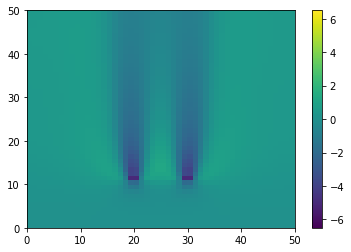

yt : [INFO     ] 2020-12-04 18:34:55,560 Parameters: current_time              = 37.5
yt : [INFO     ] 2020-12-04 18:34:55,561 Parameters: domain_dimensions         = [100 100   1]
yt : [INFO     ] 2020-12-04 18:34:55,562 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 18:34:55,563 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 18:34:55,564 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-04 18:34:55,586 e not found and no parfile passed, can not set thermal_pressure.


[[-0.00263608 -0.0026282  -0.00262095 ... -0.00190634 -0.00196864
  -0.00198545]
 [-0.00719428 -0.00716598 -0.00708892 ... -0.00436441 -0.00455624
  -0.00466862]
 [-0.00933673 -0.00921034 -0.00894928 ... -0.00547412 -0.0057644
  -0.00591977]
 ...
 [ 0.1945165   0.19498185  0.19620174 ...  0.20814424  0.20655715
   0.20572243]
 [ 0.19031901  0.19077955  0.19198662 ...  0.20514753  0.20365493
   0.20296415]
 [ 0.17949753  0.17994822  0.18113154 ...  0.19552223  0.19432738
   0.1936522 ]] code_mass/(code_length**2*code_time)
<class 'yt.units.yt_array.YTArray'>


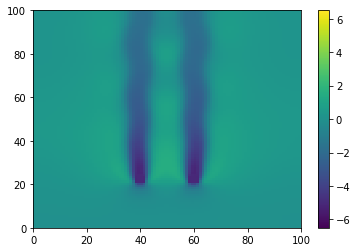

yt : [INFO     ] 2020-12-04 18:34:56,088 Parameters: current_time              = 37.5
yt : [INFO     ] 2020-12-04 18:34:56,088 Parameters: domain_dimensions         = [200 200   1]
yt : [INFO     ] 2020-12-04 18:34:56,089 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 18:34:56,090 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 18:34:56,091 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-04 18:34:56,171 e not found and no parfile passed, can not set thermal_pressure.


[[0.00106703 0.00105708 0.00103765 ... 0.001829   0.00178676 0.00176747]
 [0.00430925 0.00431599 0.00435482 ... 0.00702184 0.00687228 0.00673301]
 [0.00743383 0.0074638  0.00753993 ... 0.01102455 0.01088108 0.0107104 ]
 ...
 [0.1962841  0.19637674 0.19594118 ... 0.01048488 0.00697582 0.00303717]
 [0.20315468 0.20292596 0.20302299 ... 0.01642346 0.01241991 0.00871225]
 [0.22489672 0.22437632 0.22354843 ... 0.03656203 0.03357592 0.03010997]] code_mass/(code_length**2*code_time)
<class 'yt.units.yt_array.YTArray'>


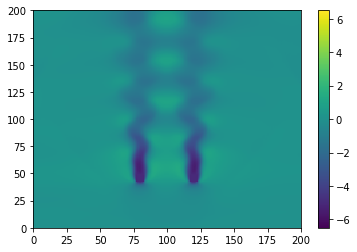

yt : [INFO     ] 2020-12-04 18:34:57,432 Parameters: current_time              = 37.5
yt : [INFO     ] 2020-12-04 18:34:57,433 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-04 18:34:57,434 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 18:34:57,436 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 18:34:57,437 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-04 18:34:57,521 e not found and no parfile passed, can not set thermal_pressure.


[[-0.00149789 -0.00148501 -0.00147953 ...  0.01006585  0.01014035
   0.01005343]
 [-0.00378116 -0.00377492 -0.00372466 ...  0.0347821   0.03518867
   0.03517128]
 [-0.00661569 -0.00661175 -0.0065637  ...  0.06040391  0.06009824
   0.06025282]
 ...
 [-0.13981189 -0.13976702 -0.13949291 ... -0.66368497 -0.66340477
  -0.66329916]
 [-0.13535487 -0.1353137  -0.13508606 ... -0.634314   -0.63413067
  -0.63407874]
 [-0.12731535 -0.12731374 -0.12725172 ... -0.59871768 -0.59835108
  -0.5980796 ]] code_mass/(code_length**2*code_time)
<class 'yt.units.yt_array.YTArray'>


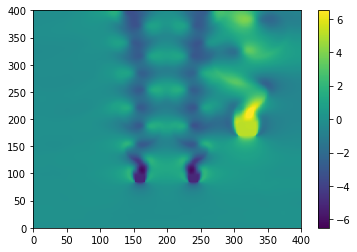

'\n# plot average error over different times, in function of domain size\nplt.loglog(dims[0:dims.size-1],np.average(err_approx,0))\nplt.xticks(dims[0:dims.size-1], dims[0:dims.size-1])\nplt.xlabel("Domain size")\nplt.ylabel("Relative error to $(800x800)$ grid")\n\n#plt.savefig(\'./convergence.png\', dpi=150, format="png")\nplt.show()\n\n'

In [99]:
ts = {}
# dims = np.array([200,400,800])
dims = np.array([50,100,200,400,800])
for dim in dims:
    ts[dim] = yt.load(f'./output3_A{dim if dim > 99 else f"0{dim}"}/*.dat')

start = 50     # first timeframe to check
step = 1      # step between timeframes
data = 'm1'
nb_time_checks = 1
err_approx = np.empty((nb_time_checks,dims.size-1))

# use domain dimensions of the finest grid, to easily compare the grids
#dom_dims = ts[dims[-1]][0].domain_dimensions

for i in range(nb_time_checks):
    time = start+step*i
    
    # use grid with highest resolution as a reference
    ds_ref = ts[dims[-1]][time]
    
    for j in range(dims.size-1):
        ds = ts[dims[j]][time]
        comp_dims = ds.domain_dimensions
        comp = np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=comp_dims)[data]) # [comp_dims[0]//2:comp_dims[0],:]
        
        ref = np.squeeze(ds_ref.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=comp_dims)[data]) # [comp_dims[0]//2:comp_dims[0],:]
        ref_norm = np.linalg.norm(ref)
        #print(ref_norm)
        
        
        #err_approx[i,j] = np.linalg.norm(comp-ref) / ref_norm
        err = comp-ref
        print(err)
        print(type(err))
        Z = np.array(err)
        plt.pcolor(Z,vmin=-6.5, vmax=6.5) # interpolation='bilinear')
        #plt.zlim([-6.5,6.5])
        plt.colorbar()
        plt.show()
        
    
        
#print(err_approx)   

"""
# plot average error over different times, in function of domain size
plt.loglog(dims[0:dims.size-1],np.average(err_approx,0))
plt.xticks(dims[0:dims.size-1], dims[0:dims.size-1])
plt.xlabel("Domain size")
plt.ylabel("Relative error to $(800x800)$ grid")

#plt.savefig('./convergence.png', dpi=150, format="png")
plt.show()

"""